<a href="https://colab.research.google.com/github/JJukE/ReinforcementLearning/blob/main/11_1%20Classifying%20fashion%20products%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print('No. of images in training set {}'.format(train_images.shape))
print('No. of labels in training set {}'.format(train_labels.shape))
print('No. of images in test set {}'.format(test_images.shape))
print('No. of labels in test set {}'.format(test_labels.shape))

No. of images in training set (60000, 28, 28)
No. of labels in training set (60000,)
No. of images in test set (10000, 28, 28)
No. of labels in test set (10000,)


In [ ]:
labels = {
0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'
}

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

Sneaker


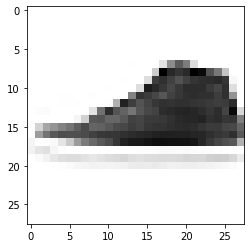

In [ ]:
img1 = train_images[41].reshape(28, 28)
print(labels[train_labels[41]])
plt.imshow(img1, cmap='Greys')

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.4856 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.3202 - accuracy: 0.8821
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2744 - accuracy: 0.8989
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2457 - accuracy: 0.9085
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2222 - accuracy: 0.9176
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2016 - accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1854 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1697 - accuracy: 0.9357
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1558 - accuracy: 0.9407
Epoch 10/10
1875/1875 [==============================] - 56s 30m

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


'Ankle boot'

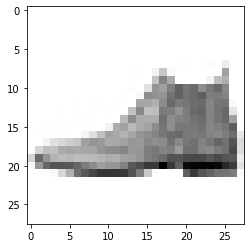

In [ ]:
plt.imshow(test_images[0].reshape(28, 28), cmap='Greys')
labels[np.argmax(model.predict(test_images[0].reshape(-1, 28, 28, 1)))]